In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/Tatamotors.csv")

In [ ]:
df.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,25-03-2021,EQ,127.00,127.95,124.00,127.20,126.40,125.60,125.76,145.0,28.4,4340078,545818048.0,30260
1,26-03-2021,EQ,128.90,131.50,126.45,125.60,128.80,128.65,129.16,145.0,28.4,4504488,581805975.8,21042
2,30-03-2021,EQ,130.00,131.15,127.10,128.65,127.70,129.05,128.99,145.0,28.8,2004933,258607640.5,11913
3,31-03-2021,EQ,129.45,133.05,127.55,129.05,128.35,128.05,130.48,145.0,28.8,2902899,378777556.5,20497
4,01-04-2021,EQ,130.15,132.90,129.20,128.05,131.00,131.45,130.99,145.0,28.8,2137789,280031486.6,26009


In [ ]:
df = df.drop(df.columns[[1]], axis=1)

In [ ]:
df.head(5)

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,25-03-2021,127.00,127.95,124.00,127.20,126.40,125.60,125.76,145.0,28.4,4340078,545818048.0,30260
1,26-03-2021,128.90,131.50,126.45,125.60,128.80,128.65,129.16,145.0,28.4,4504488,581805975.8,21042
2,30-03-2021,130.00,131.15,127.10,128.65,127.70,129.05,128.99,145.0,28.8,2004933,258607640.5,11913
3,31-03-2021,129.45,133.05,127.55,129.05,128.35,128.05,130.48,145.0,28.8,2902899,378777556.5,20497
4,01-04-2021,130.15,132.90,129.20,128.05,131.00,131.45,130.99,145.0,28.8,2137789,280031486.6,26009


<Axes: xlabel='Date '>

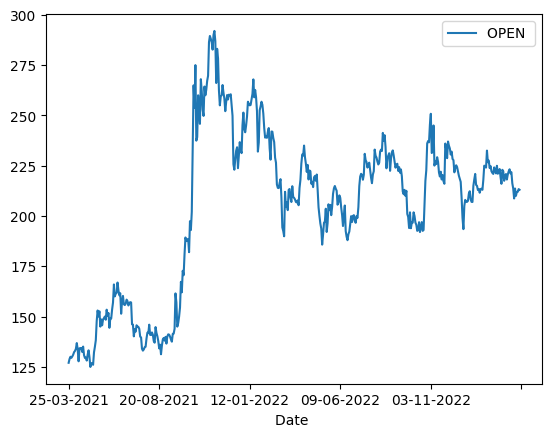

In [ ]:
df.plot(x = "Date ", y = "OPEN ") 

In [ ]:
len(df)

499

In [ ]:
tata_close = df['close ']

In [ ]:
tata_close = pd.DataFrame(tata_close)

In [ ]:
tata_close.reset_index(drop = True, inplace = True)
tata_close.shape

(499, 1)

In [ ]:
train = tata_close.iloc[:480]
test = tata_close.iloc[480:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Creating the Model

In [ ]:
test.shape

(19, 1)

In [ ]:
help(TimeseriesGenerator)  # validation

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [ ]:
from typing import Generator
length = 19
batch_size = 32
Generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size )
# will create a objebt with train-length and last 19 values will be predicted/validated

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(SimpleRNN(30,input_shape = (length, n_features)))
model.add(Dropout(rate = 0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(Generator,epochs = 10, shuffle = False) # generally takes more longer time than ANN

Epoch 1/10


<ipython-input-24-da0ef5b5bca6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(Generator,epochs = 10, shuffle = False) # generally takes more longer time than ANN


15/15 [==============================] - 2s 6ms/step - loss: 0.1058
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0507
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0314
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0219
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0114


In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

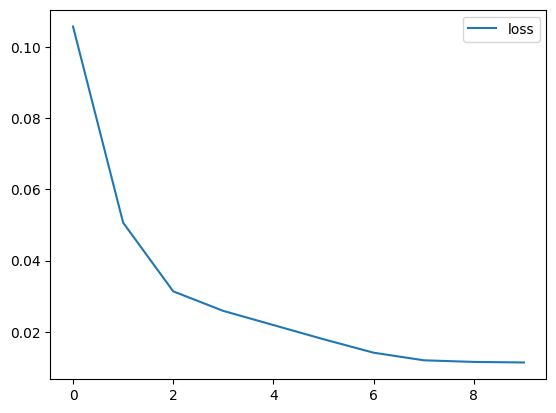

In [ ]:
losses.plot()

Evalute test set

In [ ]:
first_eval_batch = scaled_train[-length:]    # last 19 values in a train set

In [ ]:
first_eval_batch

array([[0.63164215],
       [0.59711798],
       [0.60552387],
       [0.58991294],
       [0.59801861],
       [0.57730411],
       [0.57910537],
       [0.57550285],
       [0.5947163 ],
       [0.580006  ],
       [0.580006  ],
       [0.59141399],
       [0.57880516],
       [0.57640348],
       [0.57820474],
       [0.56619634],
       [0.54668268],
       [0.57970579],
       [0.58060642]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.63164215],
        [0.59711798],
        [0.60552387],
        [0.58991294],
        [0.59801861],
        [0.57730411],
        [0.57910537],
        [0.57550285],
        [0.5947163 ],
        [0.580006  ],
        [0.580006  ],
        [0.59141399],
        [0.57880516],
        [0.57640348],
        [0.57820474],
        [0.56619634],
        [0.54668268],
        [0.57970579],
        [0.58060642]]])

In [ ]:
model.predict(first_eval_batch)  # first prediction after train set which is first value of the test

1/1 [==============================] - 0s 189ms/step


array([[0.59477645]], dtype=float32)

In [ ]:
scaled_test[0]  # i can apply for loop for above line of code and get prediction for all test values

array([0.55208646])

Note: Pay close attention to what is being outputed and in what dimensions. Add your own print statements to see what is really going on .

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
   # get prediction 1 time stamp ahead([0] is  just for grabing number instead of [array])
   current_pred = model.predict(current_batch)[0]
   # store predictions
   test_predictions.append(current_pred)
   # update batch to now include prediction and drop first value
   current_batch  = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
test_predictions

[array([0.59477645], dtype=float32),
 array([0.5879201], dtype=float32),
 array([0.59332144], dtype=float32),
 array([0.59357363], dtype=float32),
 array([0.6048125], dtype=float32),
 array([0.6175897], dtype=float32),
 array([0.63365746], dtype=float32),
 array([0.6376959], dtype=float32),
 array([0.64384186], dtype=float32),
 array([0.6533843], dtype=float32),
 array([0.6606766], dtype=float32),
 array([0.6744058], dtype=float32),
 array([0.6787369], dtype=float32),
 array([0.6860048], dtype=float32),
 array([0.685768], dtype=float32),
 array([0.68721217], dtype=float32),
 array([0.6934915], dtype=float32),
 array([0.6987723], dtype=float32),
 array([0.69939506], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[224.61001801],
       [223.46809753],
       [224.36768627],
       [224.40968805],
       [226.28152235],
       [228.40956656],
       [231.0856492 ],
       [231.75825357],
       [232.78186223],
       [234.37115981],
       [235.58568749],
       [237.87228819],
       [238.59363488],
       [239.80410235],
       [239.76466177],
       [240.00518678],
       [241.05101241],
       [241.93052843],
       [242.03424733]])

In [ ]:
test['predictions'] = true_predictions

<ipython-input-37-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [ ]:
test

,close,predictions
480,217.50,224.610018
481,219.85,223.468098
482,221.35,224.367686
483,217.40,224.409688
484,219.50,226.281522
485,222.20,228.409567
486,222.75,231.085649
487,219.70,231.758254
488,221.15,232.781862
489,215.15,234.371160


<Axes: >

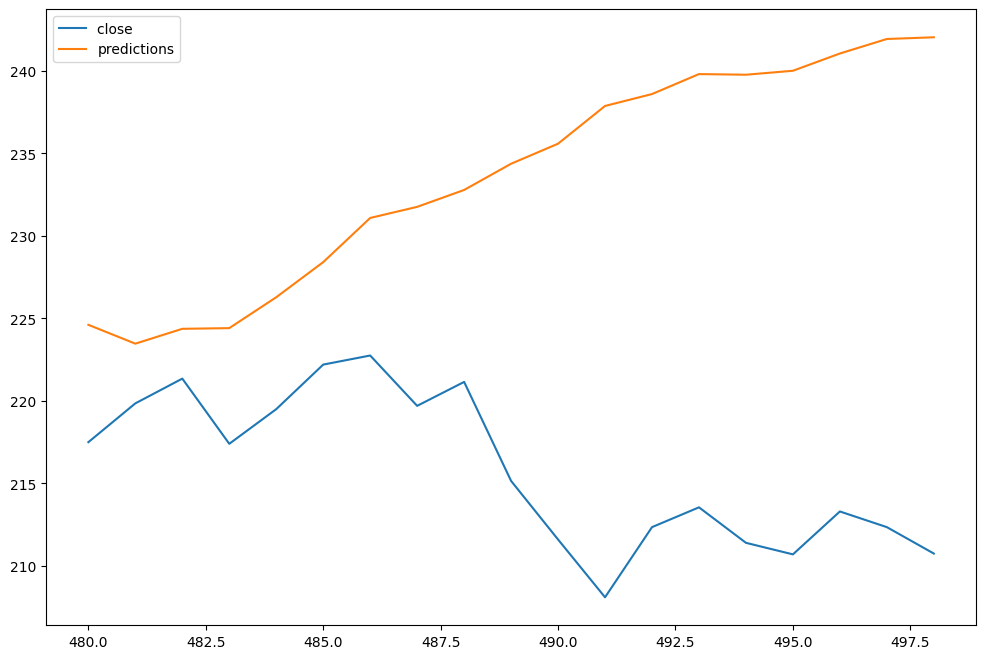

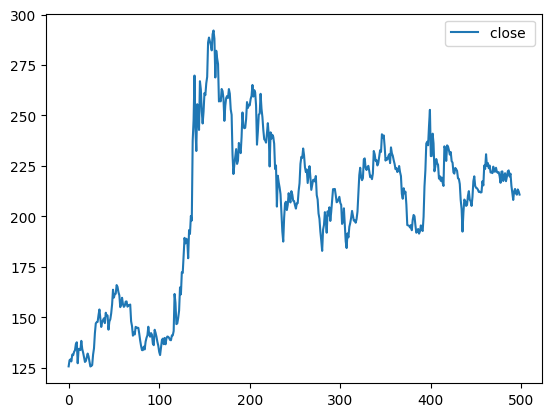

In [ ]:
test.plot(figsize = (12,8))
tata_close.plot()

In [ ]:
full_scaler  = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(tata_close)

In [ ]:
Generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 32 )

In [ ]:
model = Sequential()
model.add(SimpleRNN(30,input_shape = (length, n_features)))
model.add(Dropout(rate = 0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(Generator,epochs = 10, shuffle = False)

Epoch 1/10


<ipython-input-43-917064c265c5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(Generator,epochs = 10, shuffle = False)


15/15 [==============================] - 1s 6ms/step - loss: 0.0951
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0404
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0304
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0223
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0102


In [ ]:
full_model_losses = pd.DataFrame(model.history.history)

<Axes: >

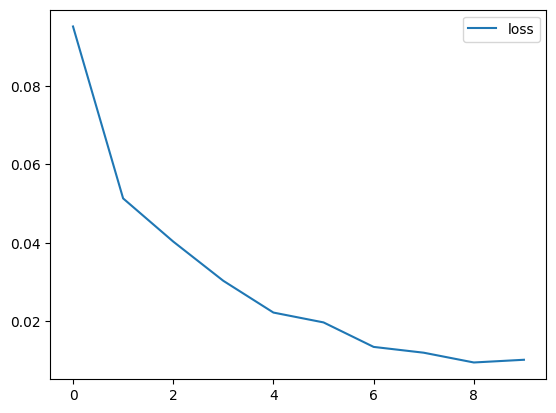

In [ ]:
full_model_losses.plot()

In [ ]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))
for i in range(20):
   # get prediction 1 time stamp ahead([0] is  just for grabing number instead of [array])
   current_pred = model.predict(current_batch)[0]
   # store predictions
   forecast.append(current_pred)
   # update batch to now include prediction and drop first value
   current_batch  = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 32ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[219.28615503],
       [216.00715664],
       [213.19894358],
       [213.76658815],
       [212.78222153],
       [209.23465392],
       [206.63492597],
       [203.37268958],
       [199.82531555],
       [199.74330734],
       [197.39327709],
       [193.09858694],
       [189.55639985],
       [187.10920262],
       [185.86000932],
       [182.21117979],
       [177.13323226],
       [175.68867257],
       [174.25142424],
       [171.53719651]])

In [ ]:
forecast.flatten()

array([219.28615503, 216.00715664, 213.19894358, 213.76658815,
       212.78222153, 209.23465392, 206.63492597, 203.37268958,
       199.82531555, 199.74330734, 197.39327709, 193.09858694,
       189.55639985, 187.10920262, 185.86000932, 182.21117979,
       177.13323226, 175.68867257, 174.25142424, 171.53719651])

In [ ]:
df_array= np.array(tata_close)
df_array

array([[125.6 ],
       [128.65],
       [129.05],
       [128.05],
       [131.45],
       [131.15],
       [132.8 ],
       [133.6 ],
       [136.7 ],
       [137.55],
       [127.15],
       [134.25],
       [134.25],
       [133.7 ],
       [138.25],
       [134.25],
       [132.4 ],
       [129.95],
       [127.8 ],
       [128.25],
       [130.15],
       [131.95],
       [130.5 ],
       [127.9 ],
       [125.55],
       [125.8 ],
       [126.25],
       [131.45],
       [134.55],
       [142.05],
       [146.95],
       [147.5 ],
       [147.65],
       [151.  ],
       [153.8 ],
       [149.3 ],
       [145.15],
       [147.5 ],
       [148.6 ],
       [149.45],
       [147.05],
       [152.2 ],
       [150.6 ],
       [150.8 ],
       [143.8 ],
       [147.85],
       [148.95],
       [151.9 ],
       [156.35],
       [163.6 ],
       [159.7 ],
       [161.45],
       [161.6 ],
       [165.9 ],
       [165.  ],
       [162.4 ],
       [160.8 ],
       [154.95],
       [156.45

In [ ]:
full_data = pd.DataFrame(np.concatenate((forecast.flatten(),df_array.flatten())))

<Axes: >

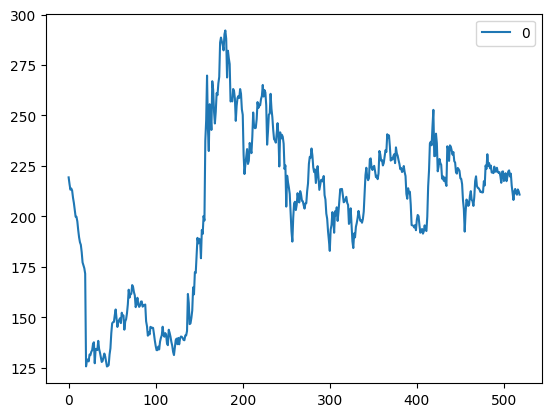

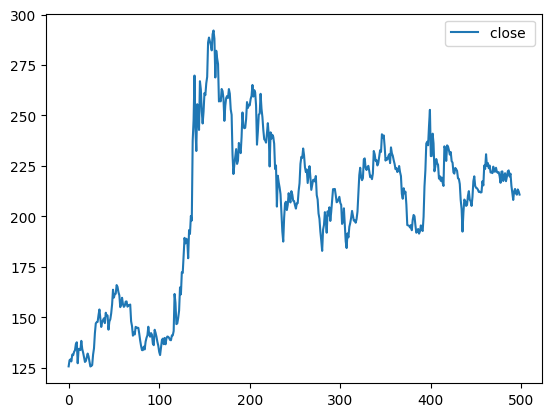

In [ ]:
full_data.plot()
tata_close.plot()

LSTM Model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
length

19

In [ ]:
scaled_test.shape

(19, 1)

In [ ]:
scaled_train

array([[3.00210147e-04],
       [1.86130291e-02],
       [2.10147103e-02],
       [1.50105074e-02],
       [3.54247974e-02],
       [3.36235365e-02],
       [4.35304713e-02],
       [4.83338337e-02],
       [6.69468628e-02],
       [7.20504353e-02],
       [9.60672471e-03],
       [5.22365656e-02],
       [5.22365656e-02],
       [4.89342540e-02],
       [7.62533774e-02],
       [5.22365656e-02],
       [4.11287902e-02],
       [2.64184929e-02],
       [1.35094566e-02],
       [1.62113479e-02],
       [2.76193335e-02],
       [3.84268988e-02],
       [2.97208046e-02],
       [1.41098769e-02],
       [0.00000000e+00],
       [1.50105074e-03],
       [4.20294206e-03],
       [3.54247974e-02],
       [5.40378265e-02],
       [9.90693485e-02],
       [1.28489943e-01],
       [1.31792255e-01],
       [1.32692885e-01],
       [1.52806965e-01],
       [1.69618733e-01],
       [1.42599820e-01],
       [1.17682378e-01],
       [1.31792255e-01],
       [1.38396878e-01],
       [1.43500450e-01],


In [ ]:
length = 15
Generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 32 )
validation_Generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 32 )

In [ ]:
model = Sequential()
model.add(LSTM(30,input_shape = (length, n_features)))
model.add(Dropout(rate = 0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(Generator, epochs = 20, validation_data = validation_Generator, callbacks = [early_stop],shuffle = False)

Epoch 1/20


<ipython-input-59-8b569114a1cc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(Generator, epochs = 20, validation_data = validation_Generator, callbacks = [early_stop],shuffle = False)


15/15 [==============================] - 3s 46ms/step - loss: 0.1154 - val_loss: 0.0077
Epoch 2/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0209 - val_loss: 0.0095
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0159 - val_loss: 5.3633e-05
Epoch 4/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0156 - val_loss: 3.5050e-04
Epoch 5/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0129 - val_loss: 5.9643e-04


<Axes: >

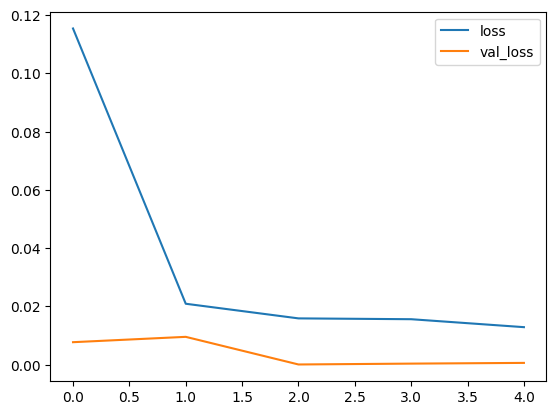

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length: ]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
  # get prediction 1 time stamp ahead ([0] is  for grabbing just the number instead of [array])
  current_pred = model.predict(current_batch)[0]
  # store predictions
  test_predictions.append(current_pred)

  # update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 24ms/step


<ipython-input-62-0b101a24afc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<Axes: >

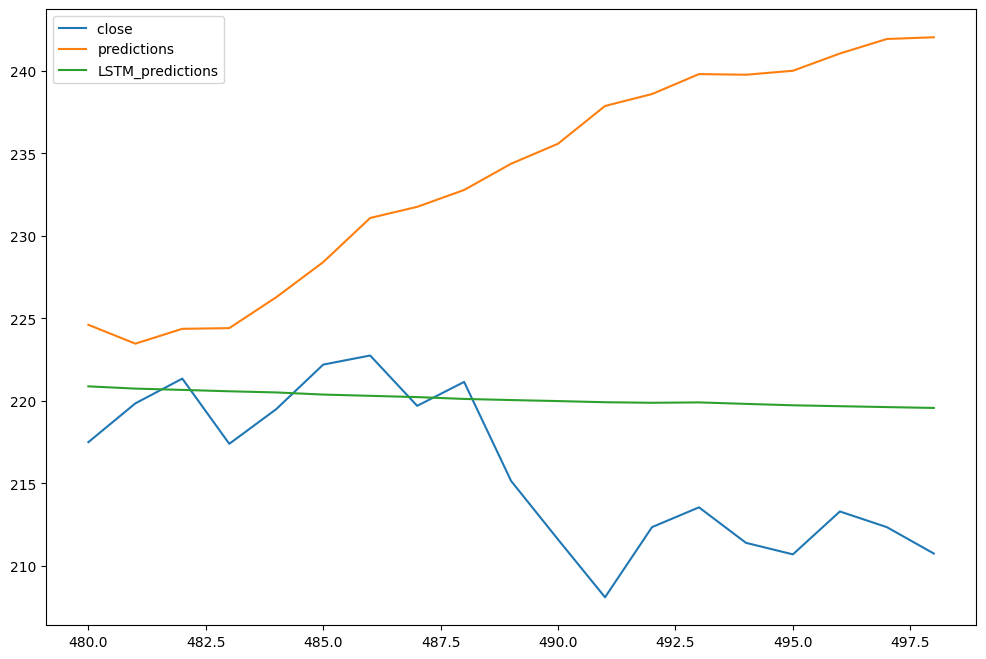

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot(figsize = (12,8))

In [ ]:
forecast = []
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))
for i in range(20):
   # get prediction 1 time stamp ahead([0] is  just for grabing number instead of [array])
   current_pred = model.predict(current_batch)[0]
   # store predictions
   forecast.append(current_pred)
   # update batch to now include prediction and drop first value
   current_batch  = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

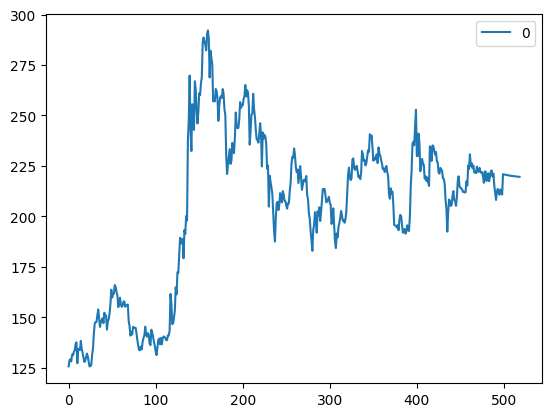

In [ ]:
full_data.plot();

In [ ]:
forecast

array([[220.88159752],
       [220.74473186],
       [220.66618822],
       [220.58272071],
       [220.51247617],
       [220.3832147 ],
       [220.30754994],
       [220.2309818 ],
       [220.11942045],
       [220.05158821],
       [219.98908685],
       [219.91925925],
       [219.88628125],
       [219.90869676],
       [219.81897515],
       [219.73387959],
       [219.67843643],
       [219.62528645],
       [219.57360569],
       [219.52346364]])

In [ ]:
full_data.tail(30)

,0
489,215.150000
490,211.600000
491,208.100000
492,212.350000
493,213.550000
494,211.400000
495,210.700000
496,213.300000
497,212.350000
498,210.750000


FB (Facebook) Prophet Model

In [ ]:
df.reset_index(inplace = True)

In [ ]:
data = df[['Date ','close ']]

In [ ]:
data.head()

,Date,close
0,25-03-2021,125.60
1,26-03-2021,128.65
2,30-03-2021,129.05
3,31-03-2021,128.05
4,01-04-2021,131.45


In [ ]:
data = data.rename(columns = {"Date ":"ds","close ":"y"}) # renaming the columns of dataset

In [ ]:
data.head()

,ds,y
0,25-03-2021,125.60
1,26-03-2021,128.65
2,30-03-2021,129.05
3,31-03-2021,128.05
4,01-04-2021,131.45


In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
m = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True) # the prophet model (class)
m.fit(data) # fit the model using all data

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing '25-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing '26-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing '30-03-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing '31-03-2021' in DD/MM/YYYY format

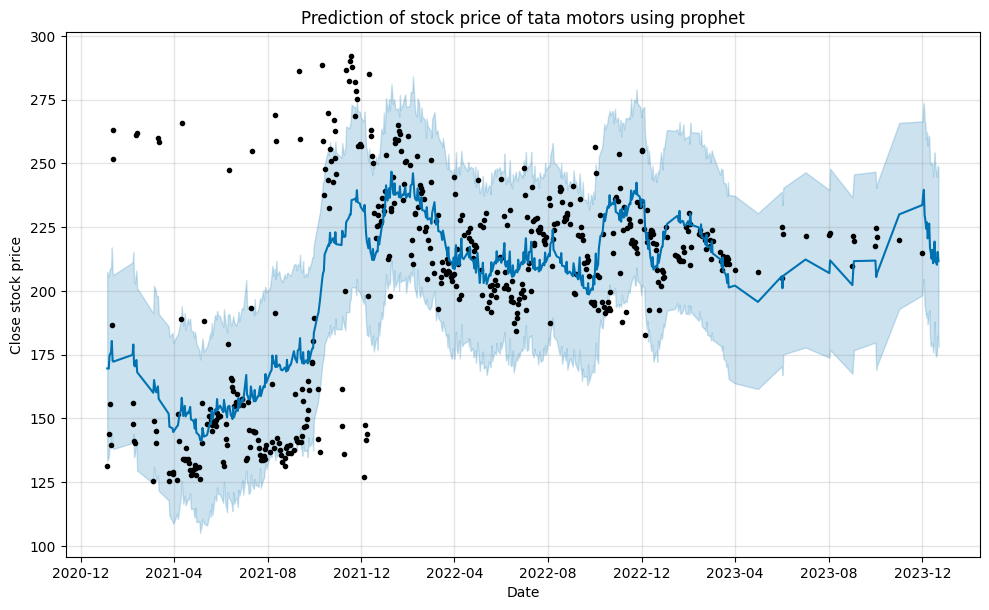

In [ ]:
future = m.make_future_dataframe(periods = 21) # we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of stock price of tata motors using prophet")
plt.xlabel("Date")
plt.ylabel("Close stock price")
plt.show()

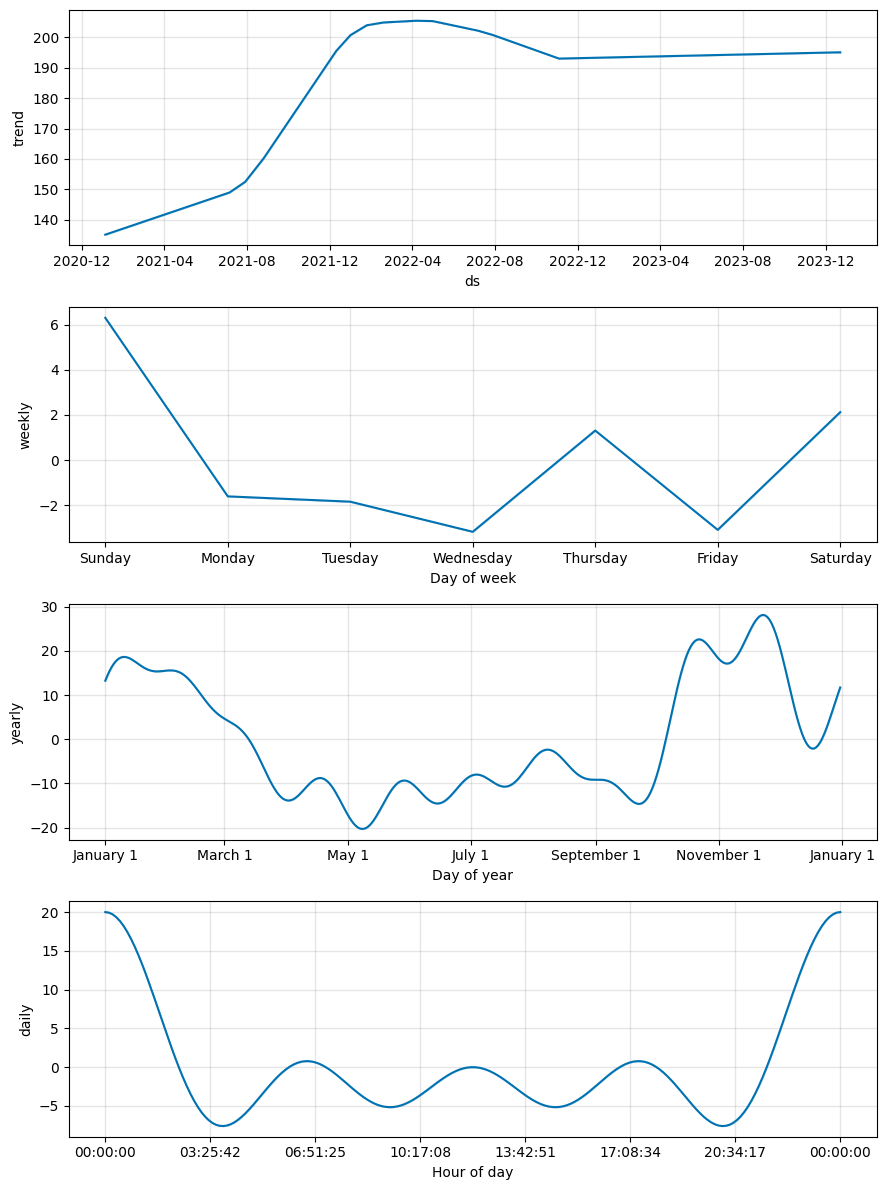

In [ ]:
m.plot_components(prediction)
plt.show()